<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None
 survivedFemales : 233 
 diedFemales : 81 
 survivedMale : 109 
 diedMale 

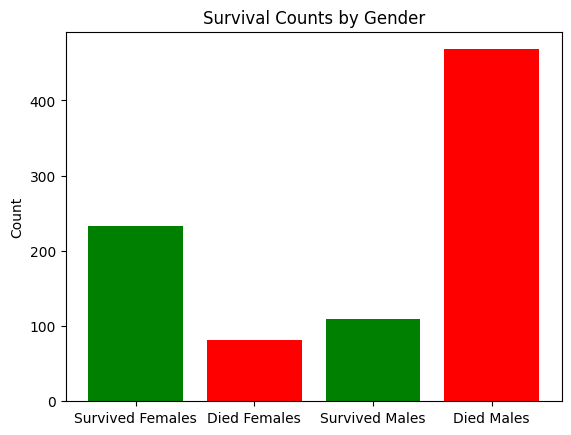

177
age
20-30    230
30-40    155
10-20    115
40-50     86
0-10      64
50-60     42
60-70     17
70-80      5
80-90      0
Name: count, dtype: int64


In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
  
titanic = sns. load_dataset('titanic')
titanic.to_csv('/users/amulya/Desktop/csv_files/titanic.csv', index=False)
print(titanic.info())
unwanted_columns = ['class', 'who', 'alive', 'embarked']
titanic = titanic.drop(unwanted_columns,axis=1)
# print(titanic)
femaleSurvivalCount = titanic[(titanic['sex'] == 'female') & (titanic['survived'] == 1)].shape[0]
femaleDiedCount = titanic[(titanic['sex'] == 'female') & (titanic['survived'] == 0)].shape[0]
maleSurvivalCount = titanic[(titanic['sex'] == 'male') & (titanic['survived'] == 1)].shape[0]
maleDiedCount = titanic[(titanic['sex'] == 'male') & (titanic['survived'] == 0)].shape[0]
print(f" survivedFemales : {femaleSurvivalCount} \n diedFemales : {femaleDiedCount} \n survivedMale : {maleSurvivalCount} \n diedMale : {maleDiedCount}")
#plotting graph
categories = ['Survived Females', 'Died Females', 'Survived Males', 'Died Males']
counts = [femaleSurvivalCount, femaleDiedCount, maleSurvivalCount, maleDiedCount]
plt.bar(categories, counts, color=['green', 'red', 'green', 'red'])
plt.ylabel('Count')    
plt.title('Survival Counts by Gender')
plt.show()
#age grp
age_null_values = titanic['age'].isna().sum()
print(age_null_values)
age = titanic['age']
bins = [0, 10,20,30,40,50,60,70,80,90]  # Add more bins as needed
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90']
age_count = pd.cut(age, bins=bins, labels=labels, include_lowest=True).value_counts()
print(age_count)

total records : 891 survived :342 died : 549
females : 314 
males : 577
in age column - total null values 177, I'm assuming I can not remove this data so can I replace these values by meadian of female age grp and male age grp?
as of now I'm replacing null valus by median, fenale-27 male - 29

a:sex
female    27.761146
male      30.355581
Name: age, dtype: float64,sex
female    27.0
male      29.0
Name: age, dtype: float64
age group: 0-10, survived male count: 19
age group: 10-20, survived male count: 10
age group: 20-30, survived male count: 39
age group: 30-40, survived male count: 23
age group: 40-50, survived male count: 12
age group: 50-60, survived male count: 4
age group: 60-70, survived male count: 1
age group: 70-80, survived male count: 1
age group: 80-90, survived male count: 0
age group: 0-10, died male count: 14
age group: 10-20, died male count: 59
age group: 20-30, died male count: 234
age group: 30-40, died male count: 77
age group: 40-50, died male count: 43
age group: 50-60, died male count: 24
age group: 60-70, died male count: 13
age group: 70-80, died male count: 4
age group: 80-90, died male count: 0
age group: 0-10, survived female count : 19
age group: 10-20, survived female count : 34
age group: 20-30, survived female count : 97
age group: 30-40, sur

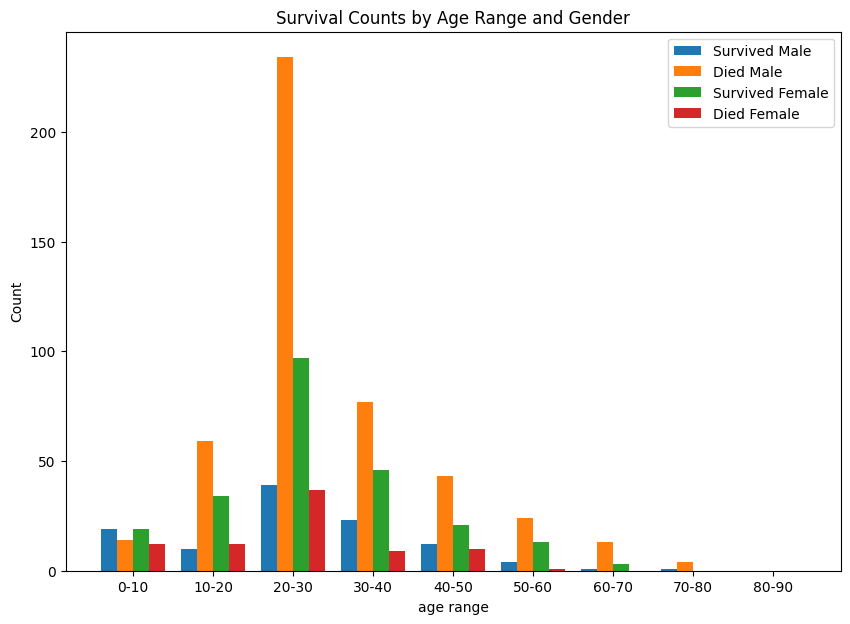

In [85]:
age_mean = titanic.groupby('sex')['age'].mean()
age_median = titanic.groupby('sex')['age'].median()
print(f'a:{age_mean},{age_median}')
median_age_by_sex = titanic.groupby('sex')['age'].transform('mean')
titanic['age'] = titanic['age'].fillna(median_age_by_sex)
male_count = {label: 0 for label in labels} 
male_count_died = {label: 0 for label in labels}
female_count = {label: 0 for label in labels}
female_count_died = {label: 0 for label in labels}
for index, row in titanic.iterrows():
     if row['sex'] == 'male' and row['survived'] == 1:
        age_range = pd.cut([row['age']], bins=bins, labels=labels, include_lowest=True)[0]
        male_count[age_range] += 1
     elif row['sex'] == 'male' and row['survived'] == 0:
         age_range = pd.cut([row['age']], bins=bins, labels=labels, include_lowest=True)[0]
         male_count_died[age_range] += 1
     elif row['sex'] == 'female' and row['survived'] == 1:
         age_range = pd.cut([row['age']], bins=bins, labels=labels, include_lowest=True)[0]
         female_count[age_range] += 1
     elif row['sex'] == 'female' and row['survived'] == 0:
        age_range = pd.cut([row['age']], bins=bins, labels=labels, include_lowest=True)[0]
        female_count_died[age_range] += 1
for label, count in male_count.items():
    print(f"age group: {label}, survived male count: {count}")
for label, count in male_count_died.items():
    print(f"age group: {label}, died male count: {count}")
for label, count in female_count.items():
    print(f"age group: {label}, survived female count : {count}")
for label, count in female_count_died.items():
    print(f"age group: {label}, died female count : {count}")

fig, ax = plt.subplots(figsize=(10, 7))

ind = range(len(labels))
width = 0.2

p1 = plt.bar(ind, male_count.values(), width, label='Survived Male')
p2 = plt.bar([i + width for i in ind], male_count_died.values(), width, label='Died Male')

p3 = plt.bar([i + 2 * width for i in ind], female_count.values(), width, label='Survived Female')
p4 = plt.bar([i + 3 * width for i in ind], female_count_died.values(), width, label='Died Female')
plt.xlabel('age range')
plt.ylabel('Count')
plt.title('Survival Counts by Age Range and Gender')
plt.xticks([i + 1.5 * width for i in ind], labels)
plt.legend()
plt.show()

class1 survived people : 136
class1 died people : 80
class2 survived people : 87
class2 died people : 97
class3 survived people : 119
class3 died people : 372
 


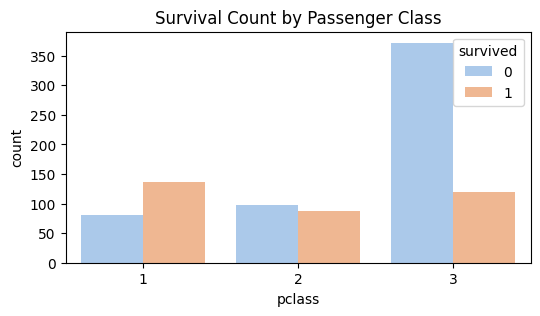

In [70]:
survived_class1 = titanic[(titanic['pclass'] == 1) & (titanic['survived'] == 1)].shape[0]
died_class1 = titanic[(titanic['pclass'] == 1) & (titanic['survived'] == 0)].shape[0]
survived_class2 = titanic[(titanic['pclass'] == 2) & (titanic['survived'] == 1)].shape[0]
died_class2 = titanic[(titanic['pclass'] == 2) & (titanic['survived'] == 0)].shape[0]
survived_class3 = titanic[(titanic['pclass'] == 3) & (titanic['survived'] == 1)].shape[0]
died_class3 = titanic[(titanic['pclass'] == 3) & (titanic['survived'] == 0)].shape[0]
print(f"class1 survived people : {survived_class1}\nclass1 died people : {died_class1}\nclass2 survived people : {survived_class2}\nclass2 died people : {died_class2}\nclass3 survived people : {survived_class3}\nclass3 died people : {died_class3}\n ")
plt.figure(figsize=(6, 3))
sns.countplot(x='pclass', hue='survived', data=titanic, palette='pastel')
plt.title('Survival Count by Passenger Class')
plt.show()


survived adult male : 88
 died adult male : 449
  survived child  : 254
 died child : 100



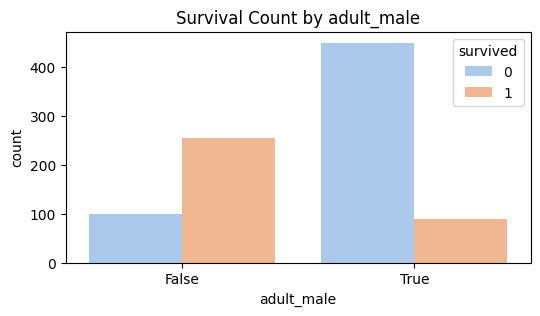

In [79]:
survived_adult_male = titanic[(titanic['adult_male'] == 1) & (titanic['survived'] == 1)].shape[0]
died_adult_male = titanic[(titanic['adult_male'] == 1) & (titanic['survived'] == 0)].shape[0]
survived_child = titanic[(titanic['adult_male'] == 0) & (titanic['survived'] == 1)].shape[0]
died_child = titanic[(titanic['adult_male'] == 0) & (titanic['survived'] == 0)].shape[0]
print(f"survived adult male : {survived_adult_male}\n died adult male : {died_adult_male}\n  survived child  : {survived_child}\n died child : {died_child}\n")
plt.figure(figsize=(6, 3))
sns.countplot(x='adult_male', hue='survived', data=titanic, palette='pastel')
plt.title('Survival Count by adult_male')
plt.show()

Observation : we can see children are more likely to survived rather than male 